# <center> ROCK OR MINE CLASSIFICATION

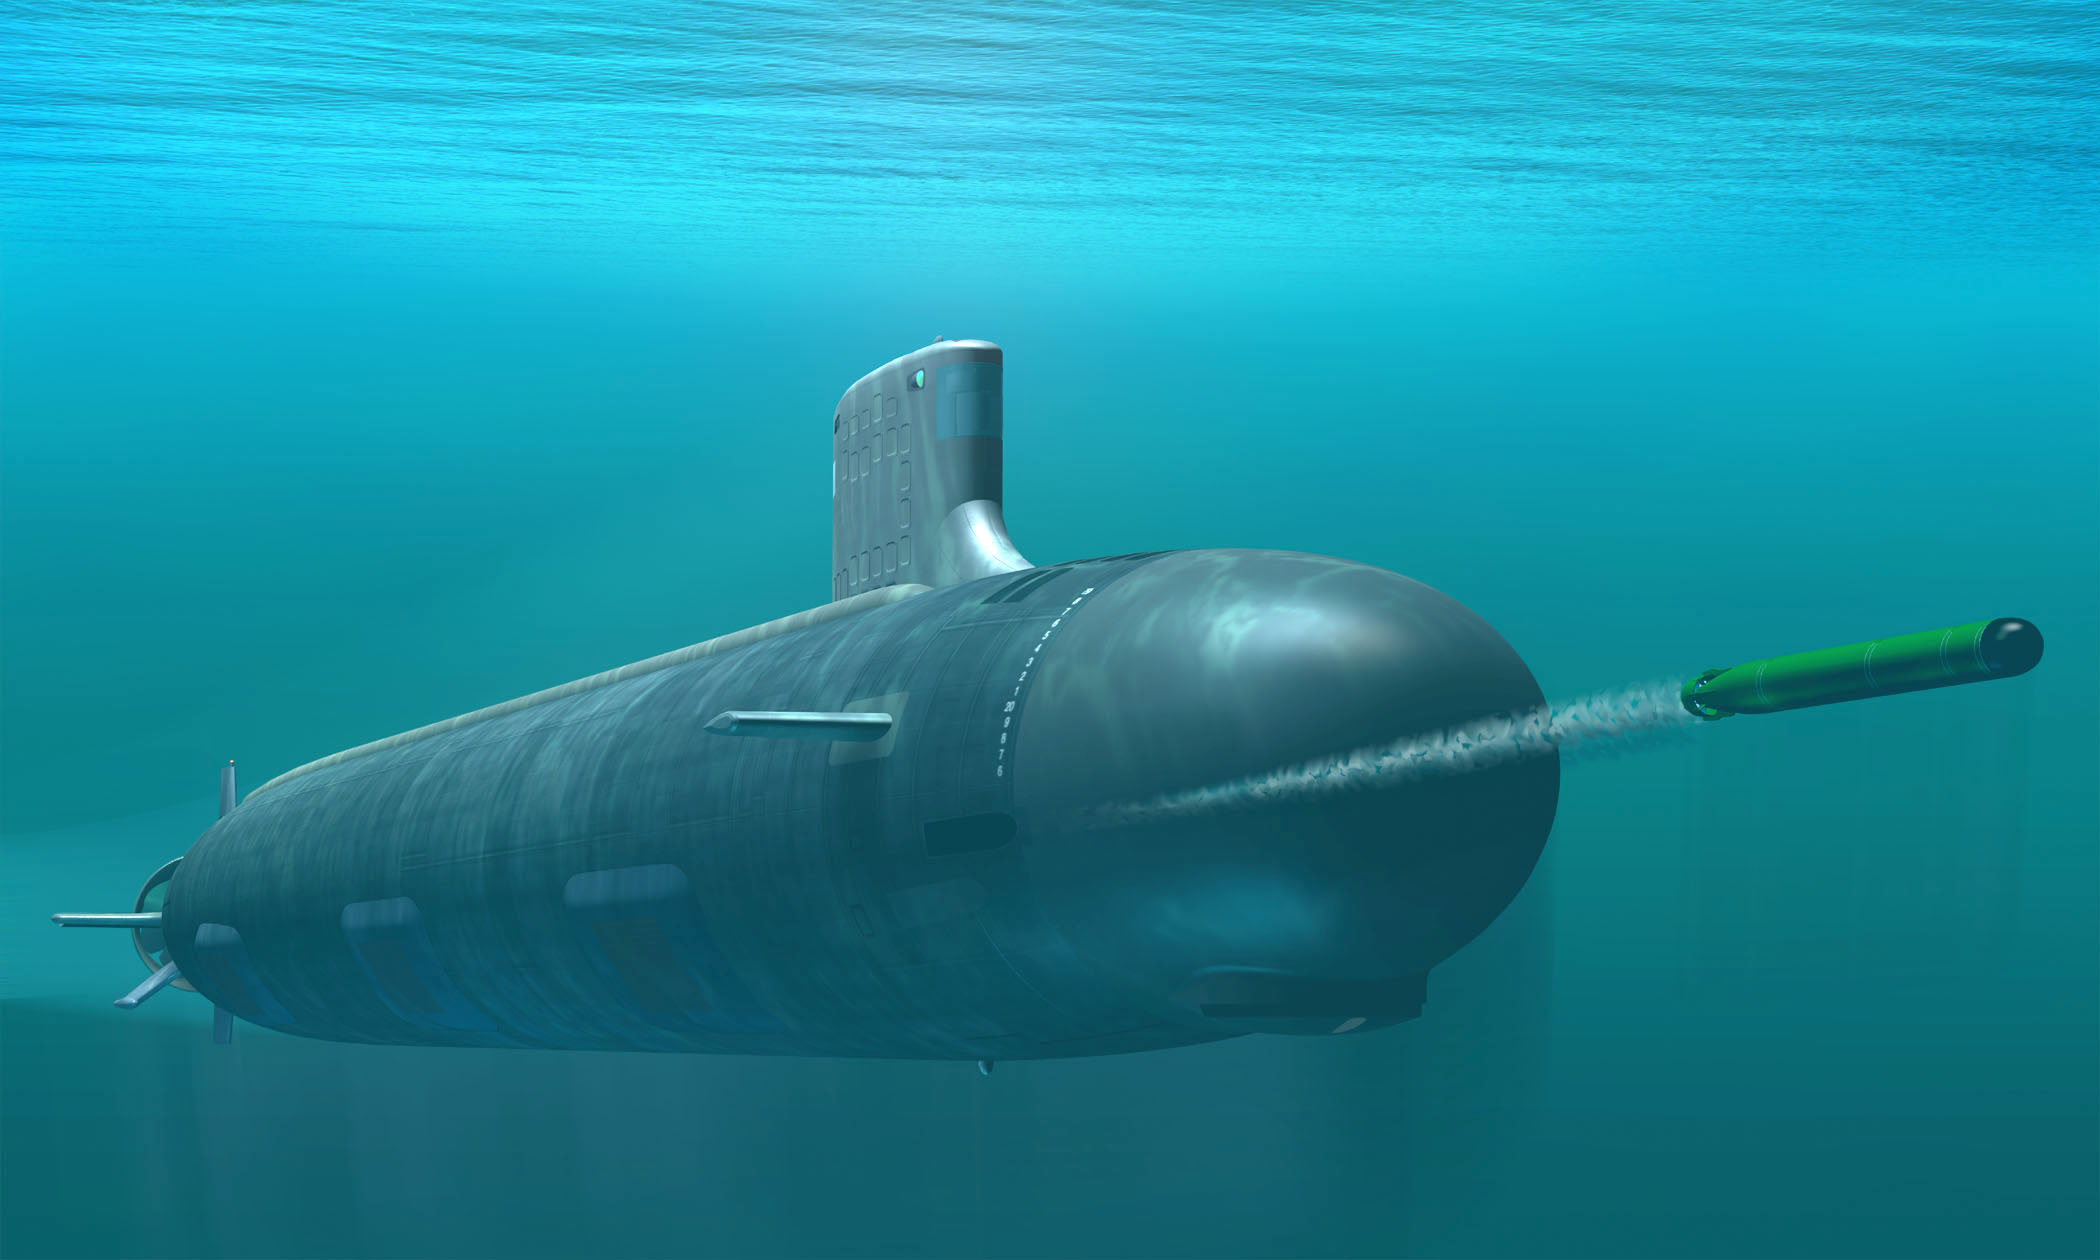

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
data = pd.read_csv('./ROCK_OR_MINE.csv')
data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
data.shape

(207, 61)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0.0200,207.0,0.029208,0.023038,0.0015,0.01330,0.0228,0.03580,0.1371
0.0371,207.0,0.038443,0.033040,0.0006,0.01640,0.0308,0.04810,0.2339
0.0428,207.0,0.043837,0.038521,0.0015,0.01890,0.0342,0.05820,0.3059
0.0207,207.0,0.054053,0.046583,0.0058,0.02445,0.0441,0.06570,0.4264
0.0954,207.0,0.075105,0.055669,0.0067,0.03770,0.0620,0.10105,0.4010
0.0986,207.0,0.104599,0.059247,0.0102,0.06695,0.0921,0.13415,0.3823
0.1539,207.0,0.121591,0.061897,0.0033,0.08060,0.1056,0.15305,0.3729
0.1601,207.0,0.134677,0.085340,0.0055,0.08035,0.1119,0.16980,0.4590
0.3109,207.0,0.177361,0.118311,0.0075,0.09675,0.1522,0.23150,0.6828
0.2111,207.0,0.208245,0.134741,0.0113,0.11115,0.1810,0.26900,0.7106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [6]:
data.isnull().mean()*100

0.0200    0.0
0.0371    0.0
0.0428    0.0
0.0207    0.0
0.0954    0.0
         ... 
0.0180    0.0
0.0084    0.0
0.0090    0.0
0.0032    0.0
R         0.0
Length: 61, dtype: float64

In [7]:
data.duplicated().sum()

0

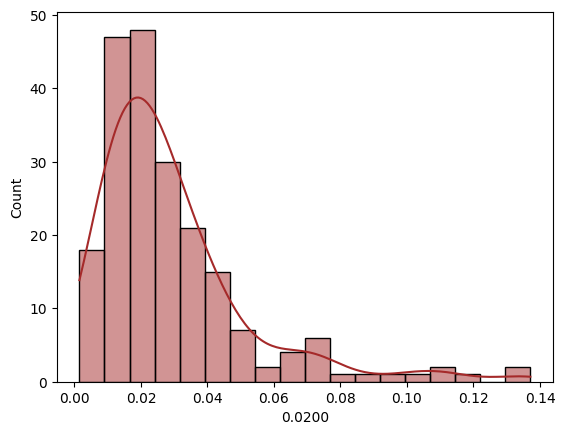

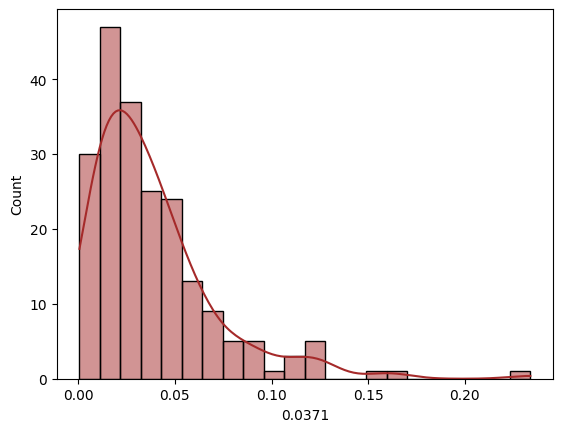

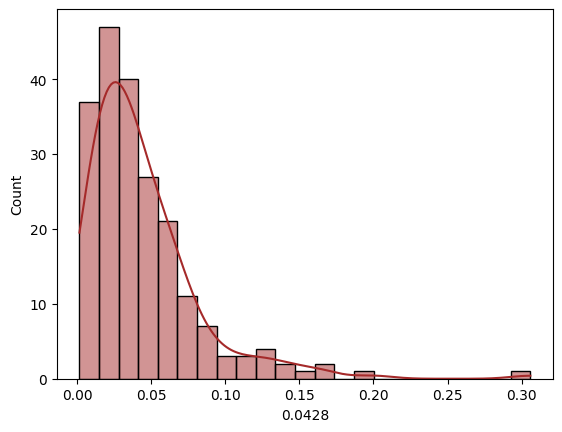

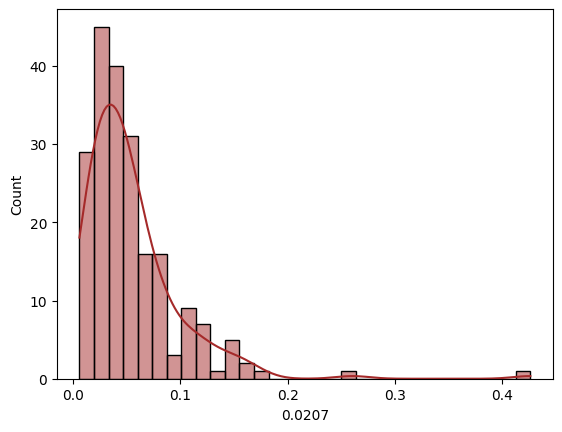

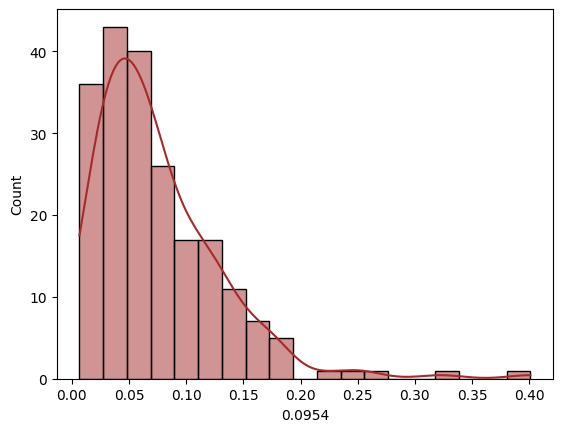

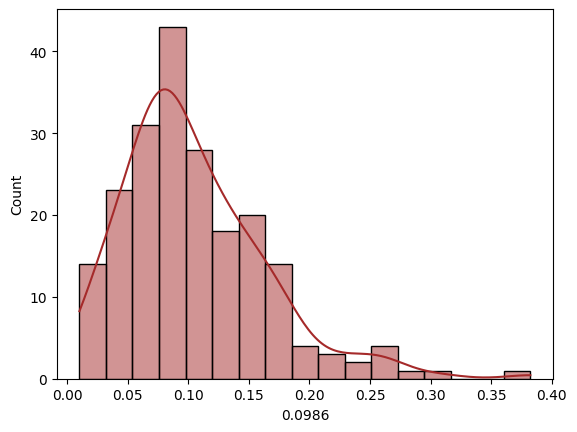

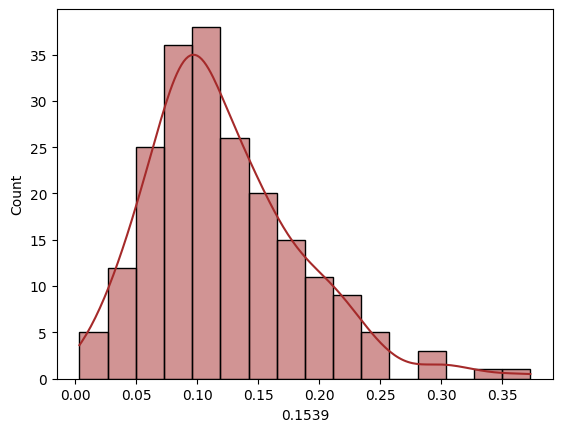

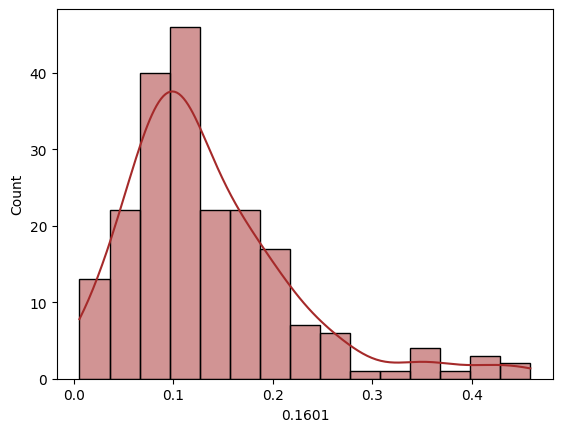

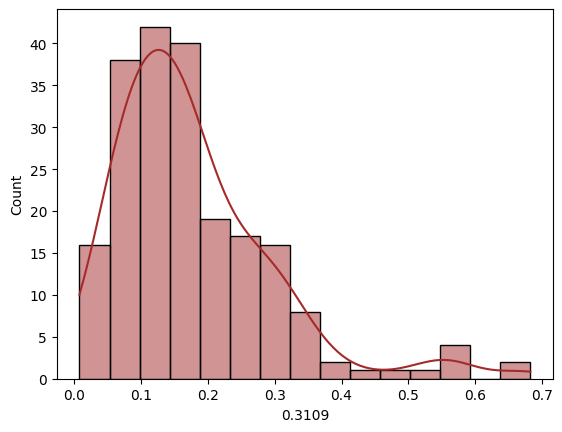

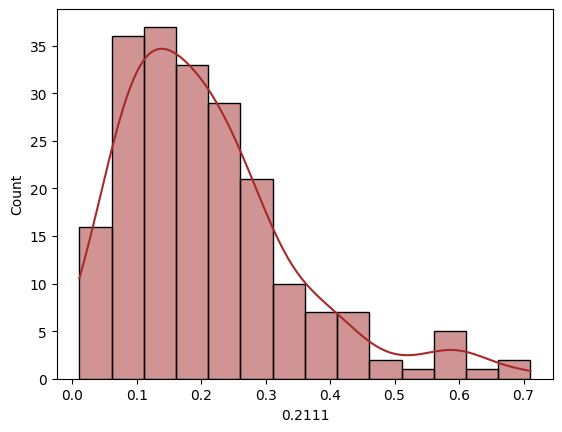

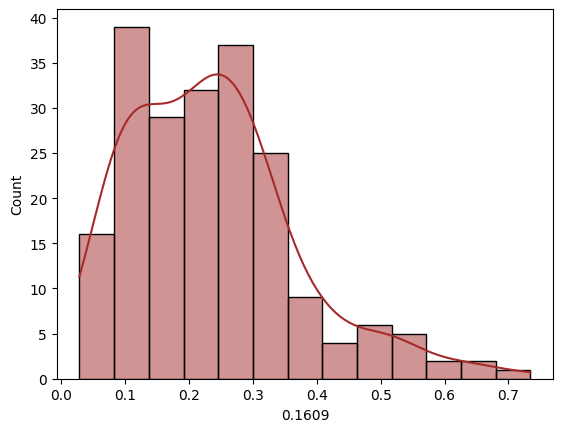

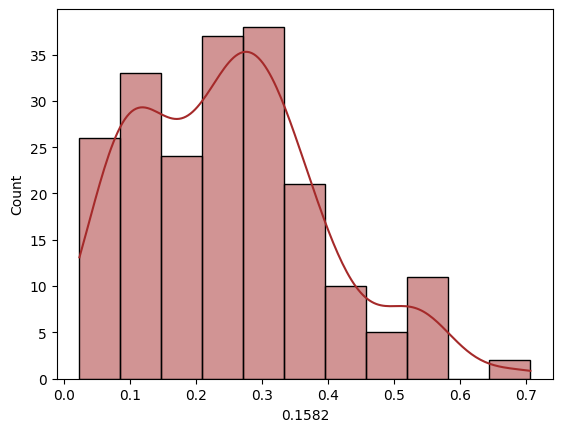

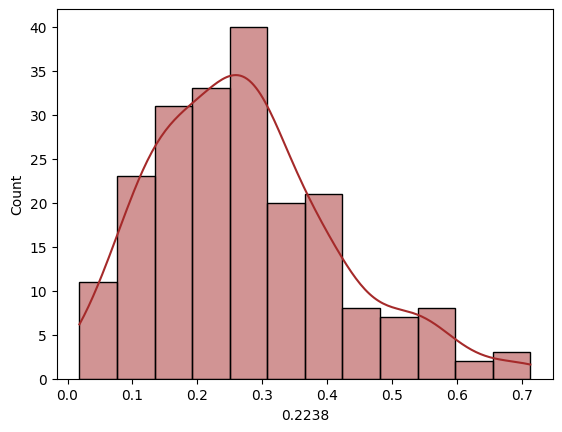

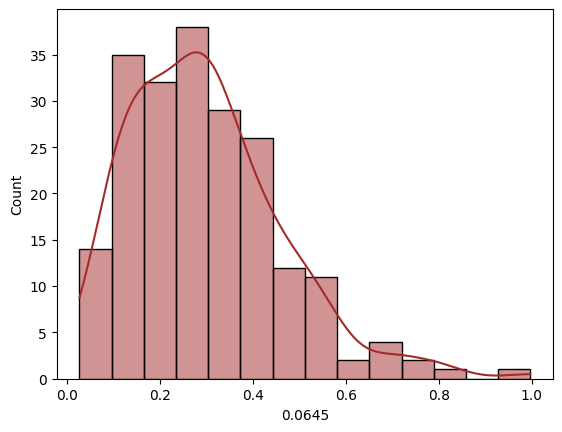

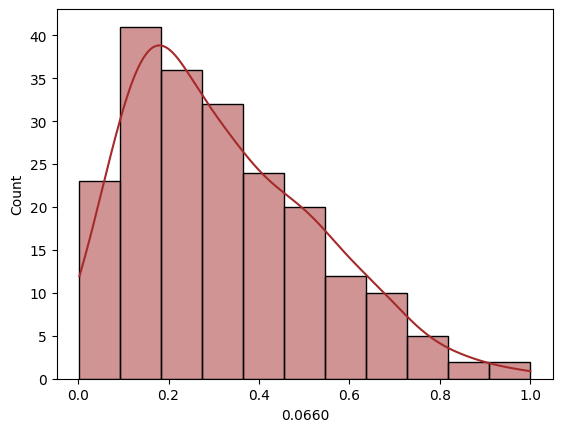

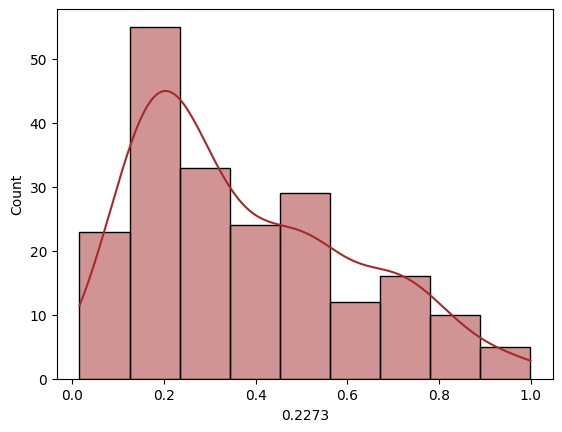

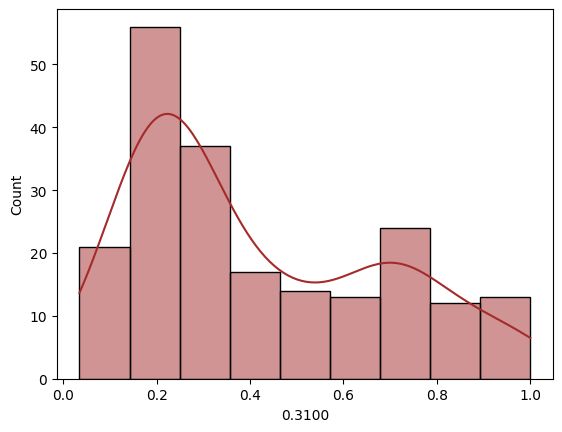

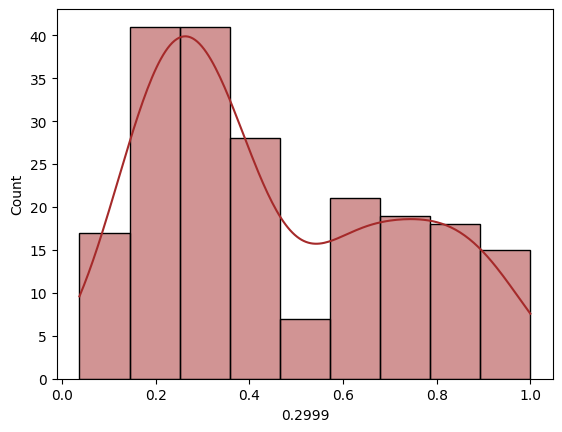

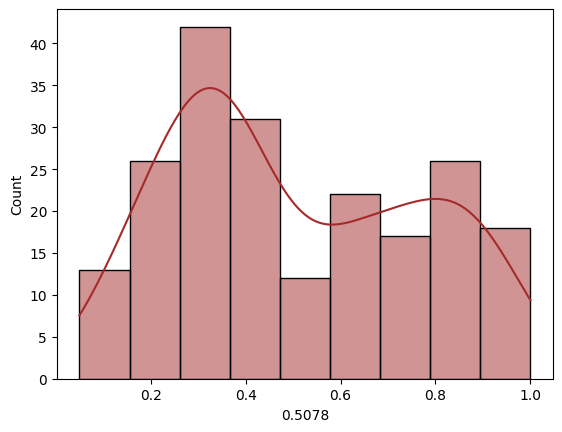

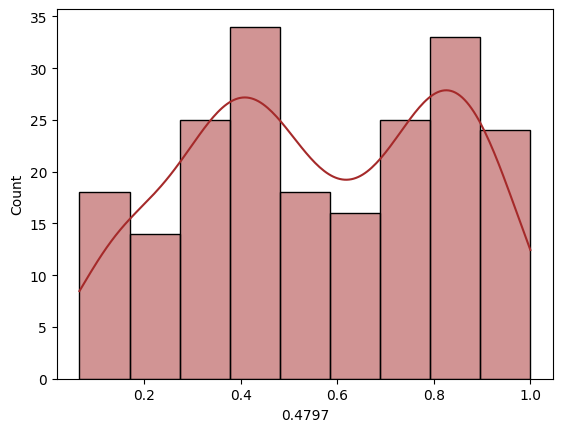

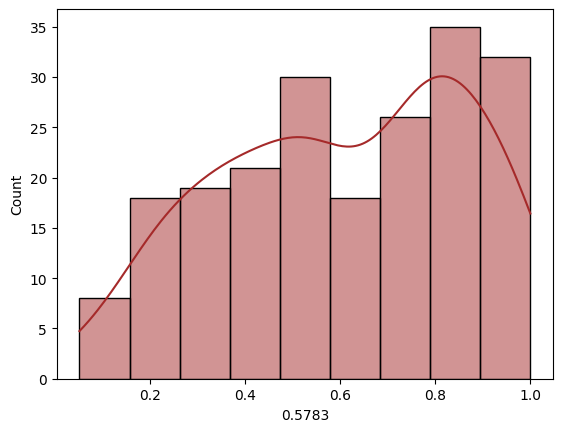

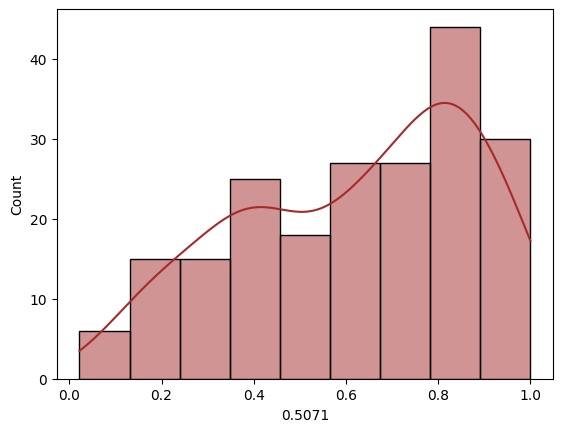

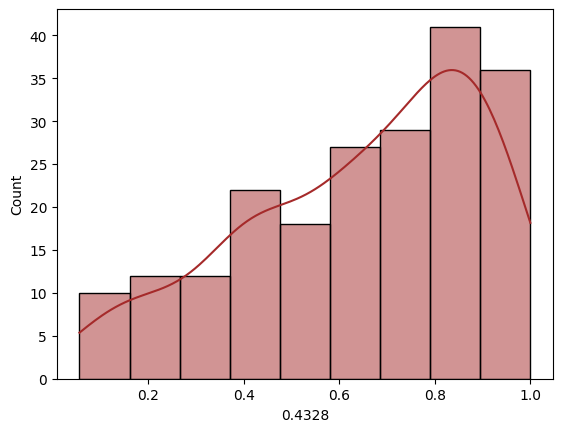

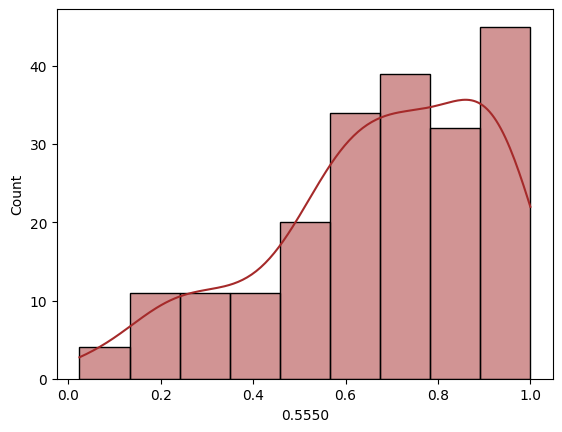

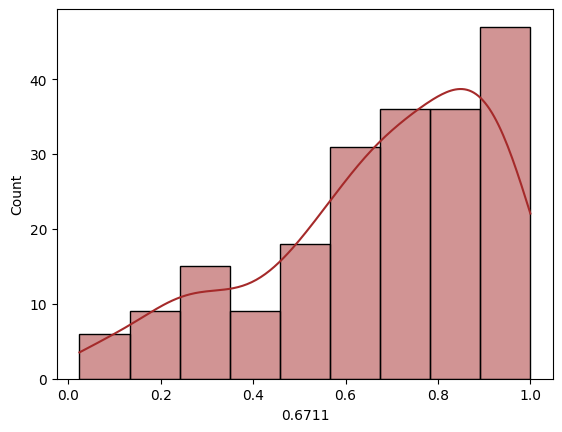

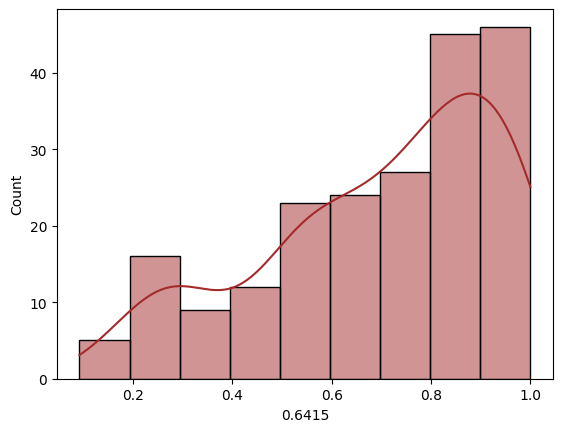

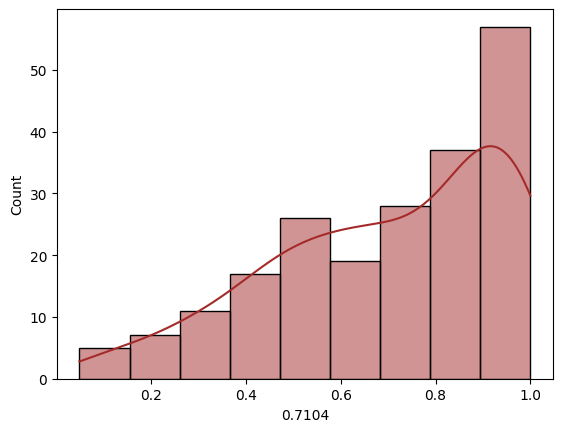

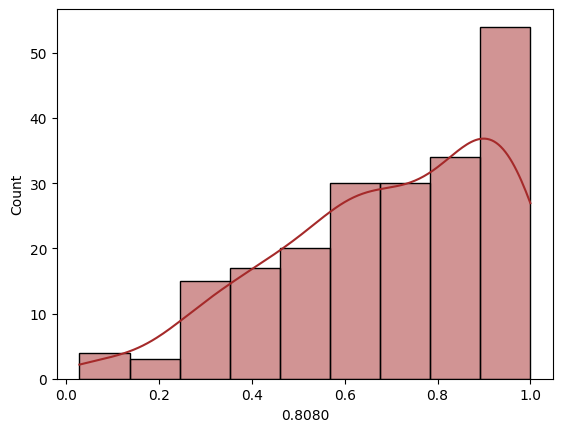

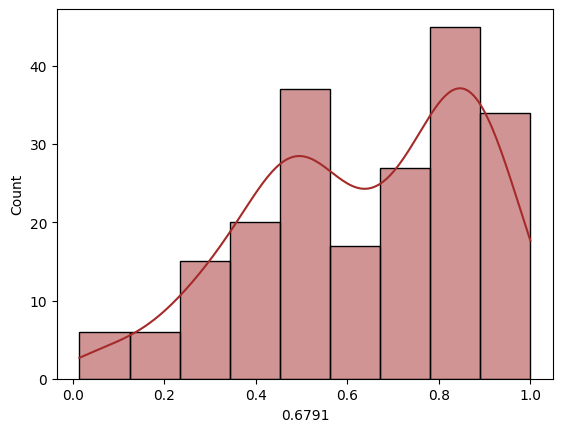

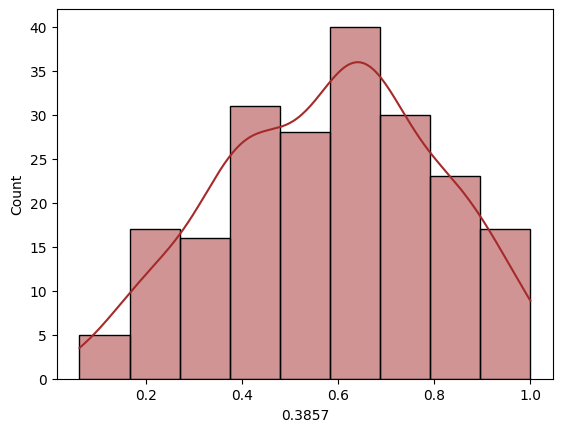

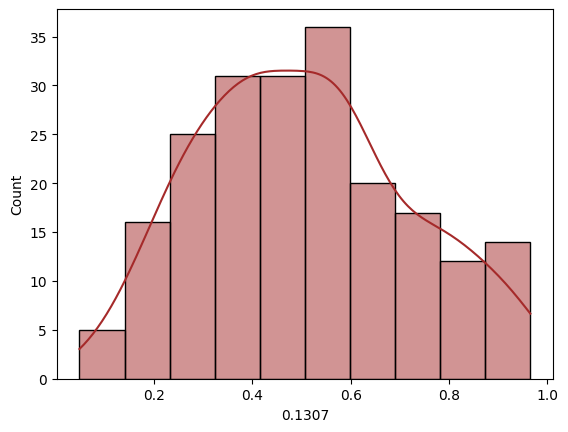

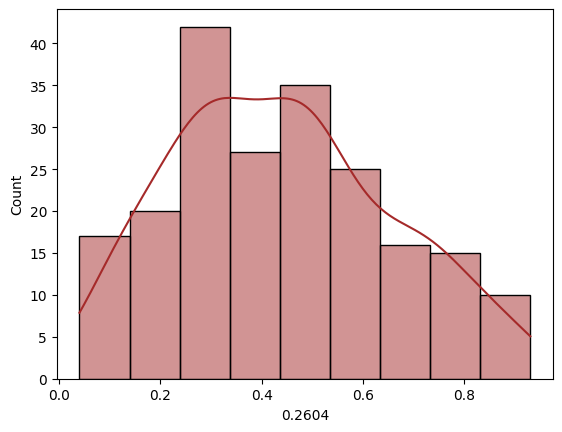

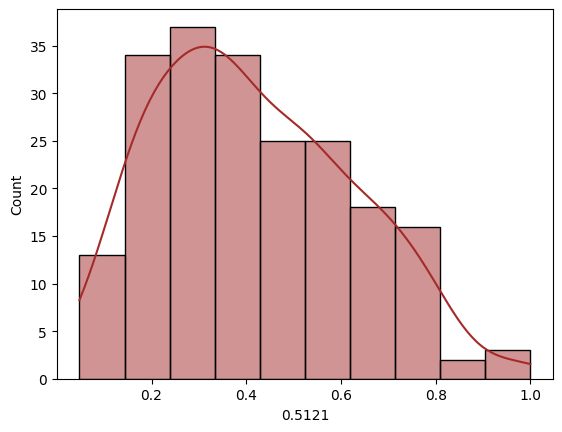

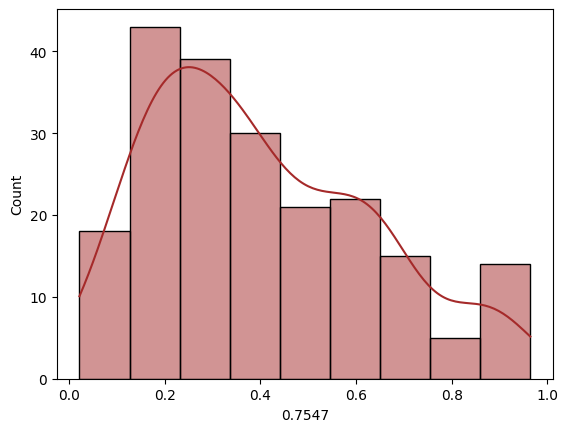

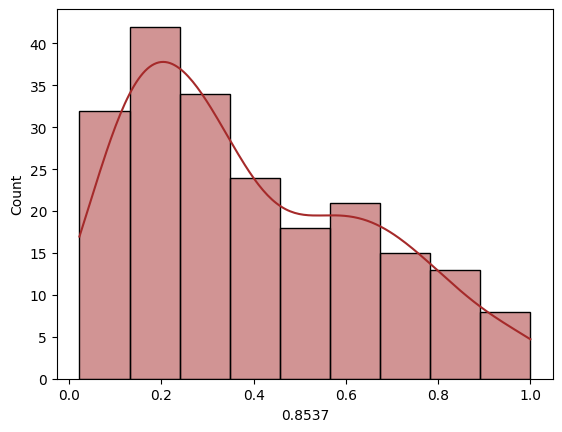

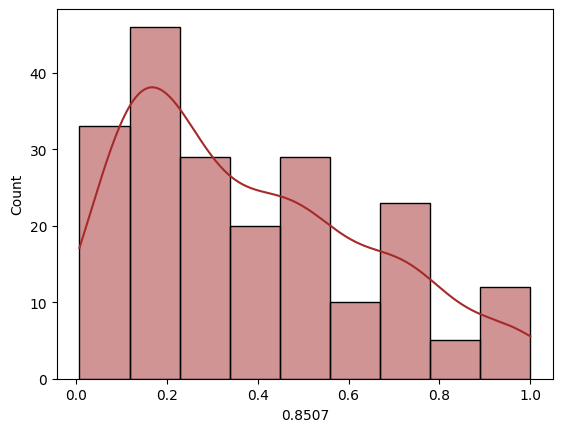

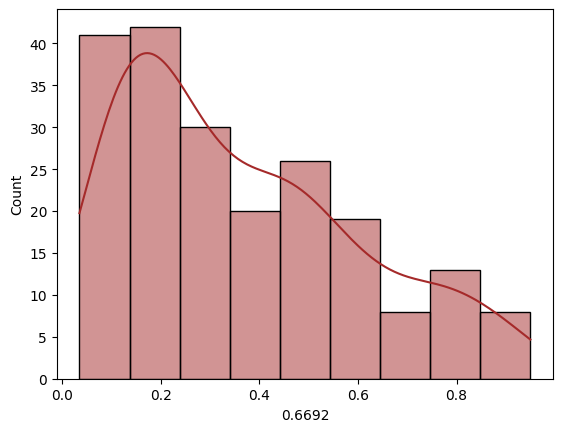

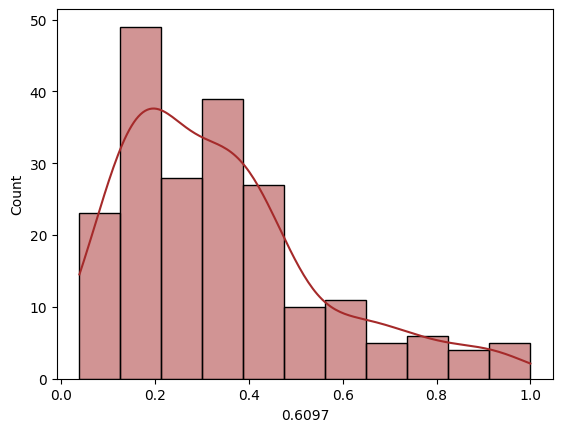

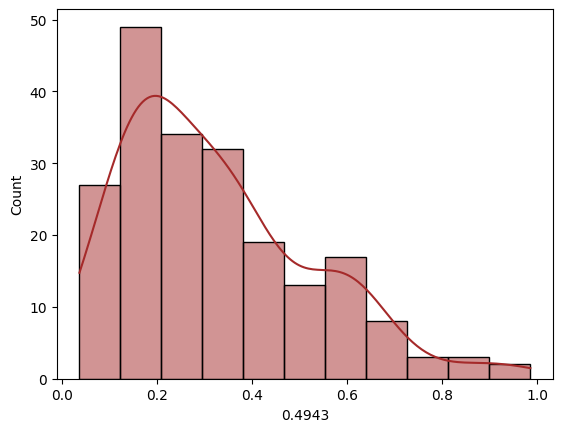

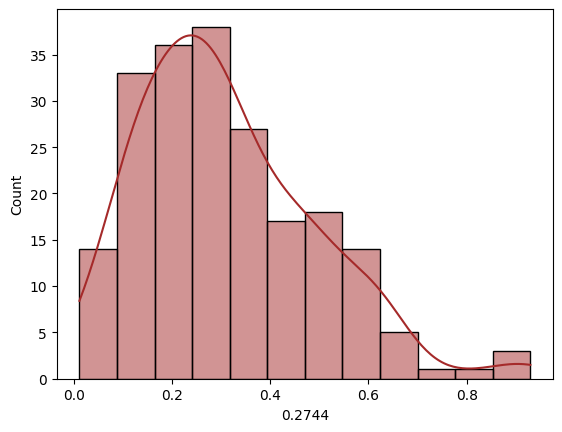

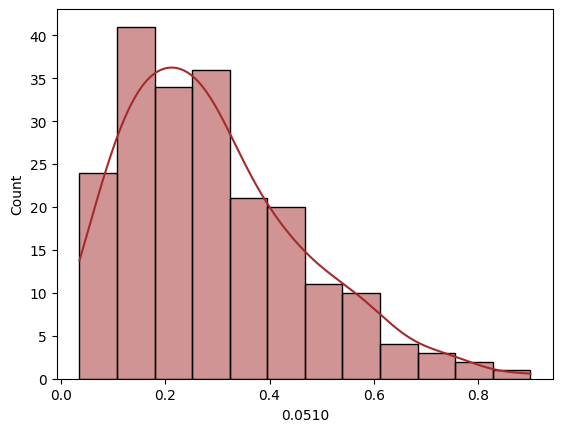

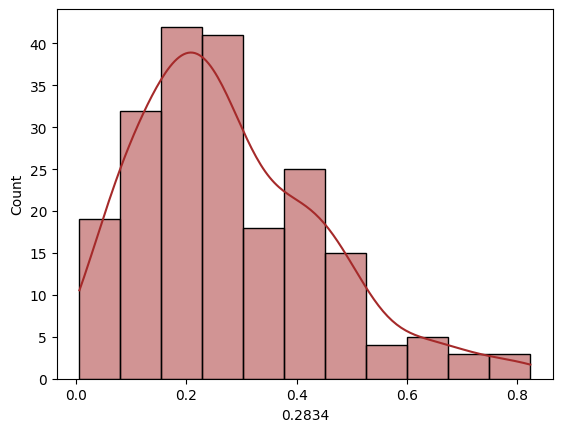

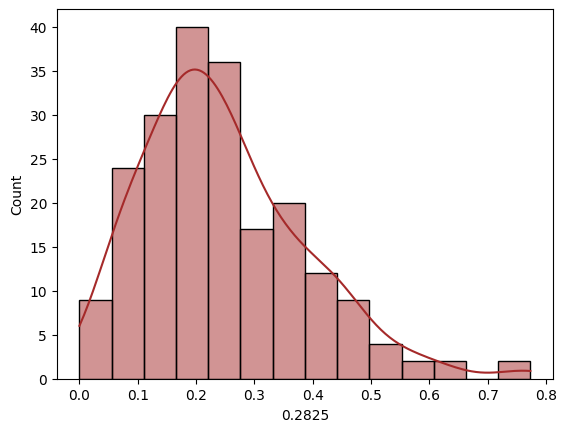

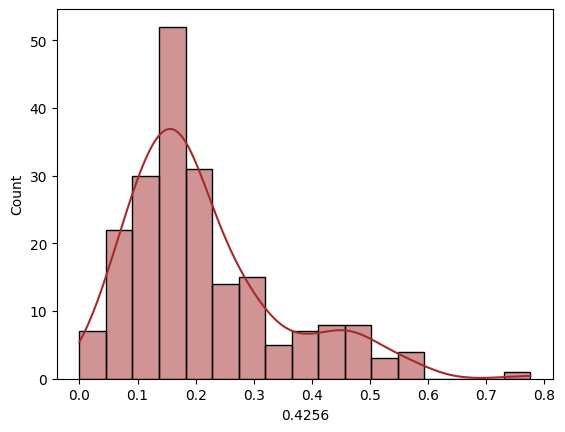

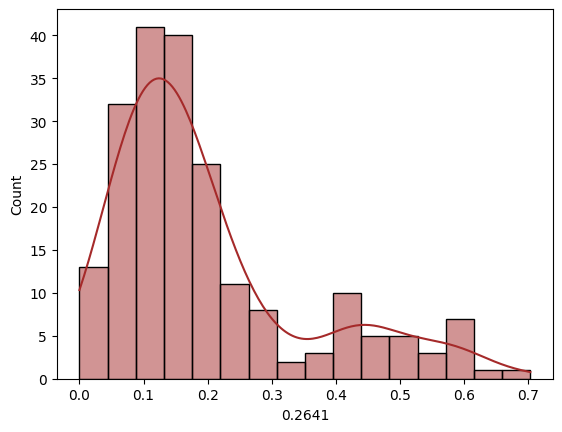

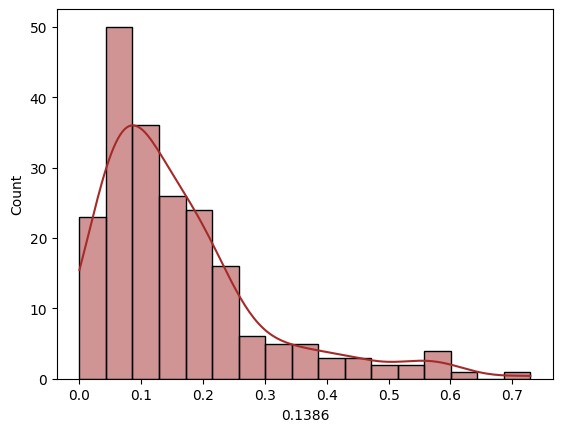

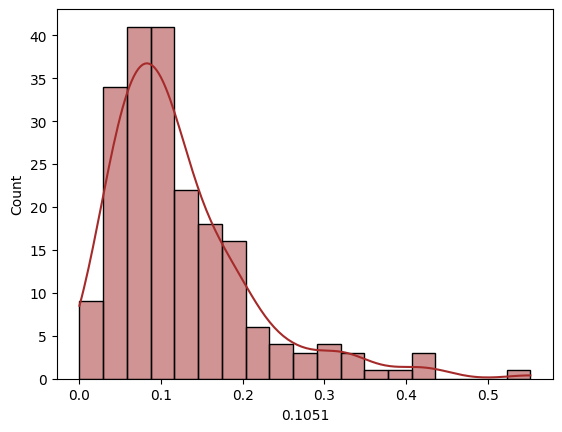

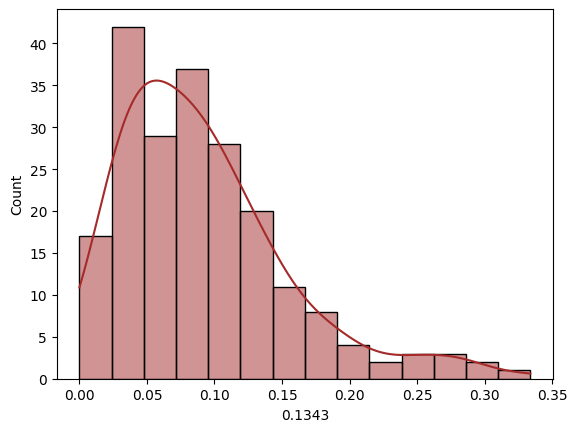

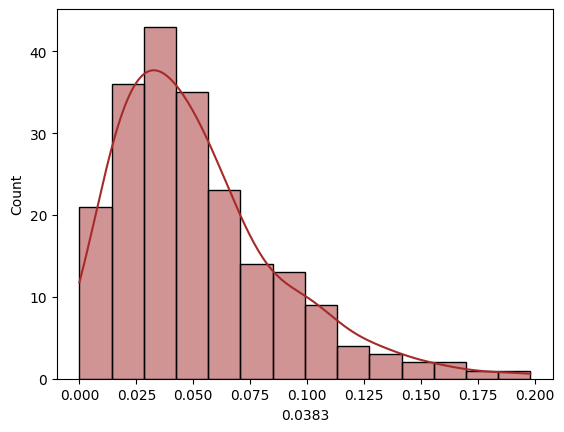

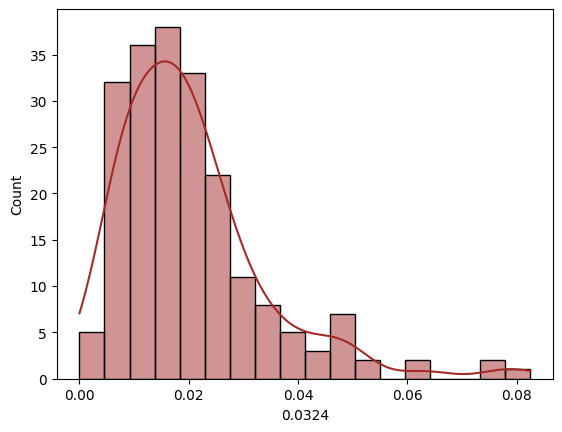

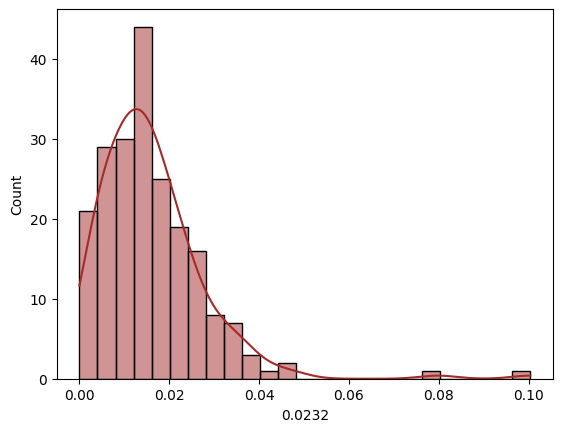

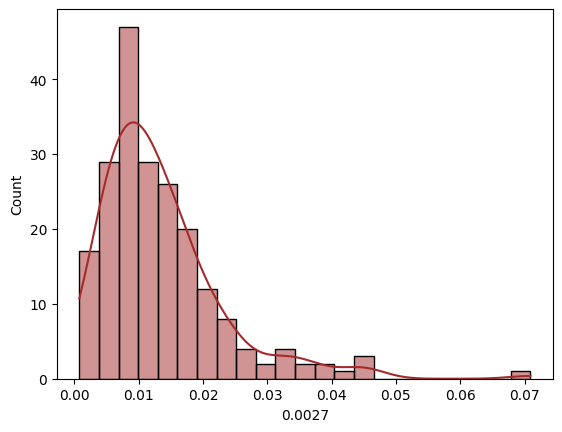

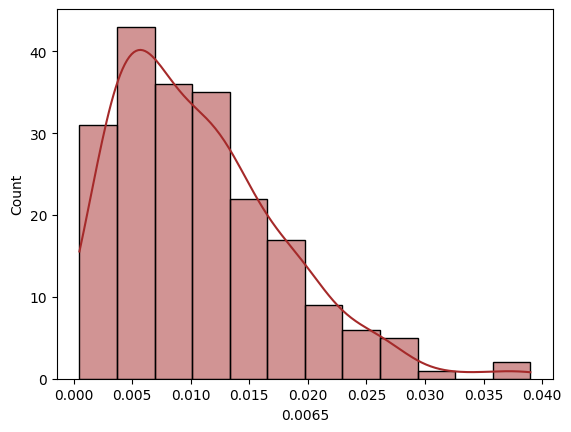

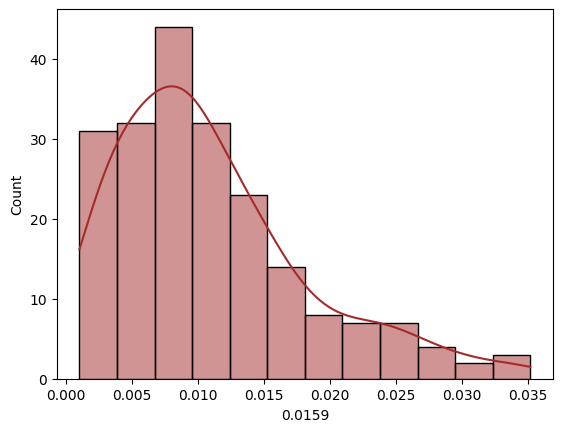

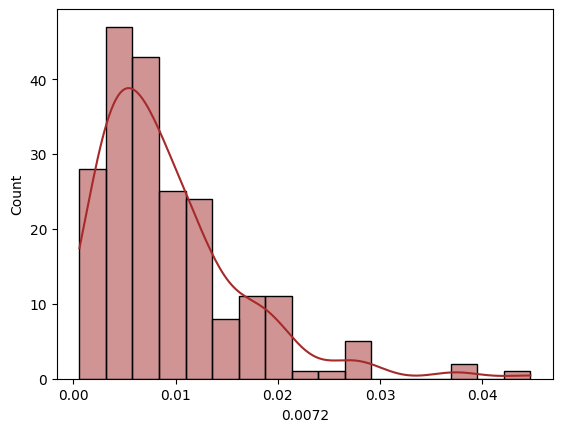

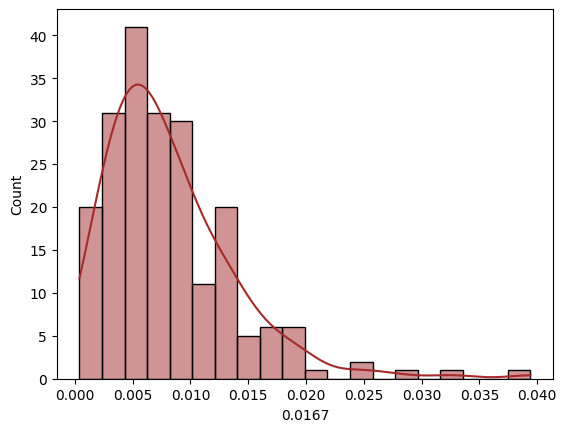

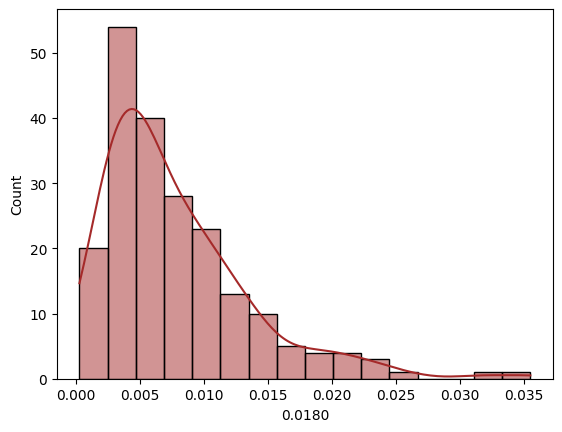

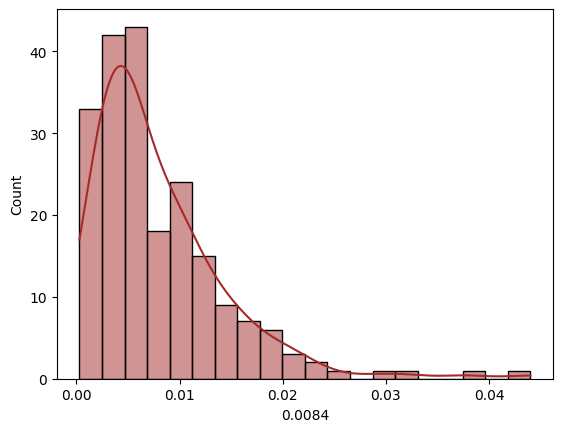

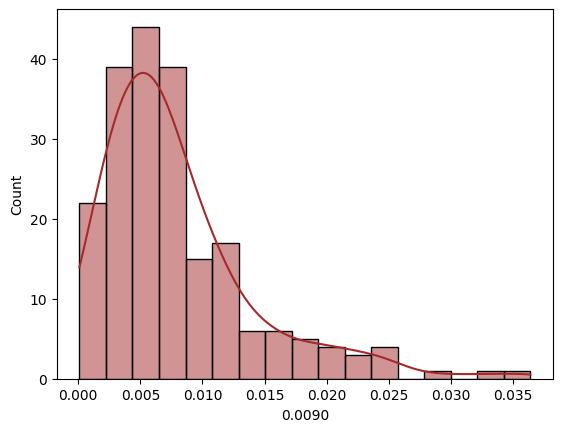

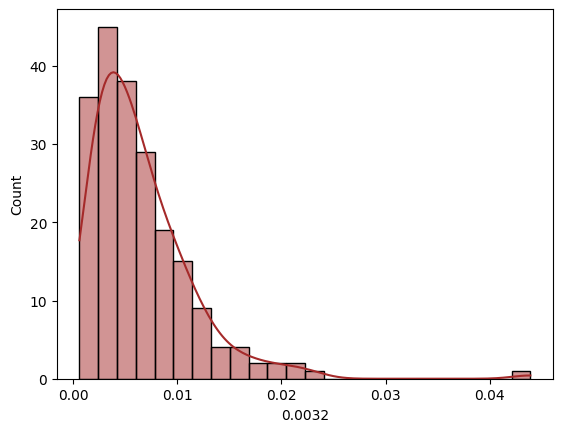

In [8]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="brown")
        plt.show()

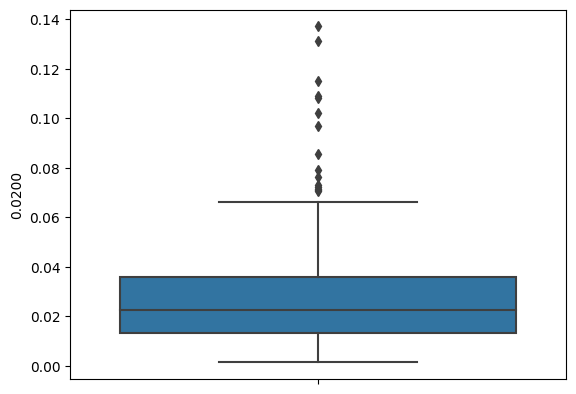

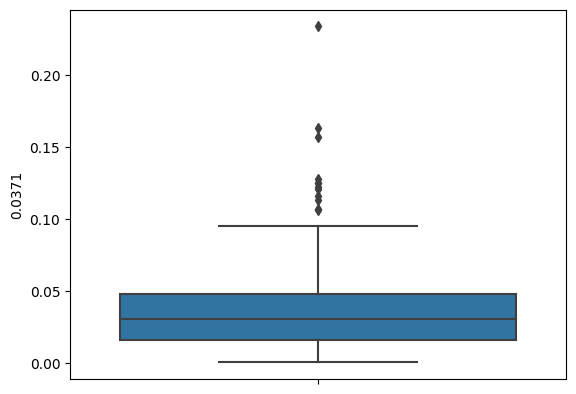

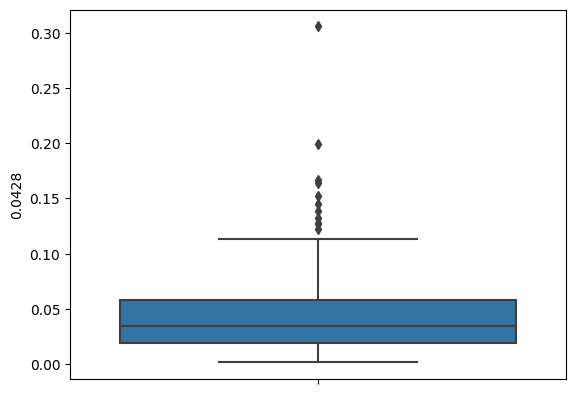

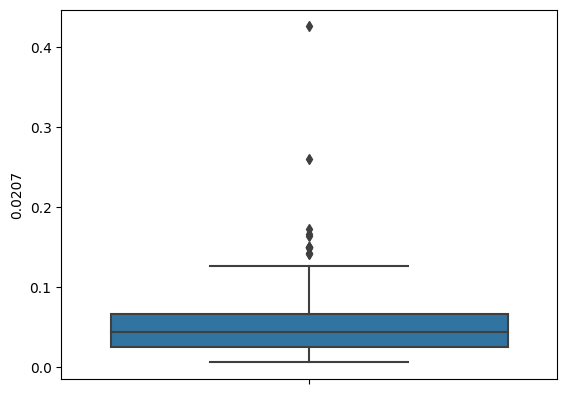

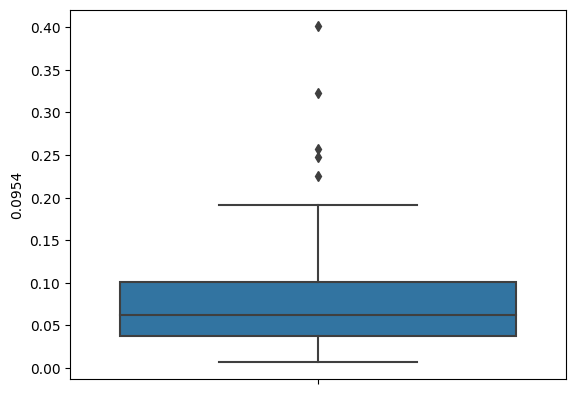

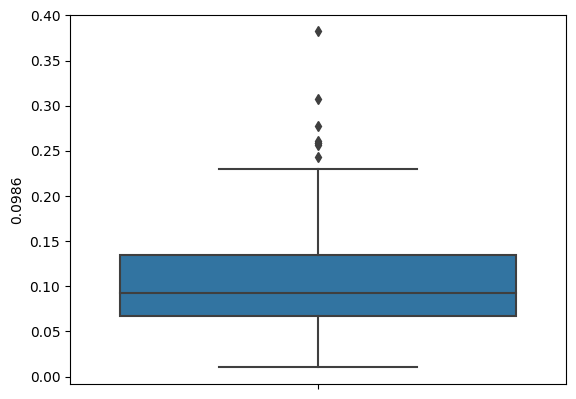

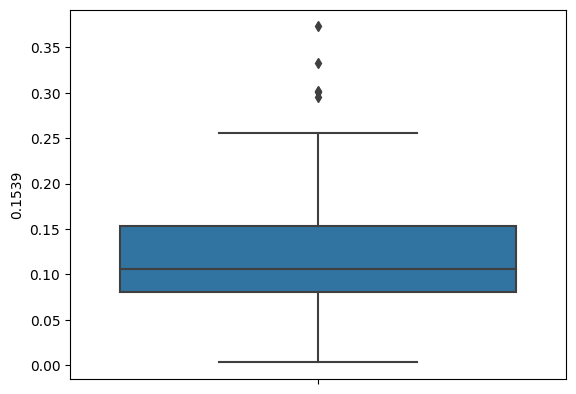

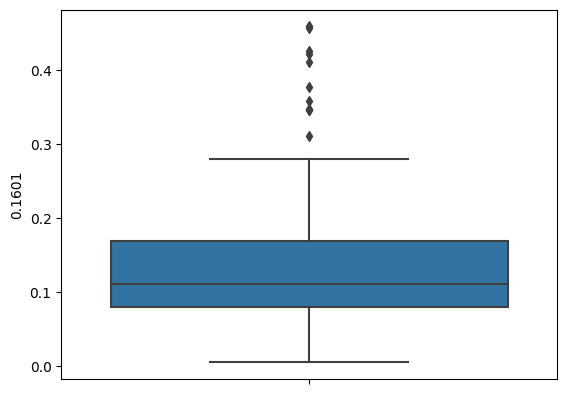

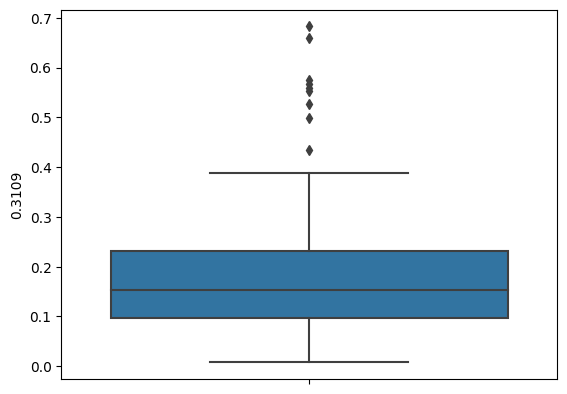

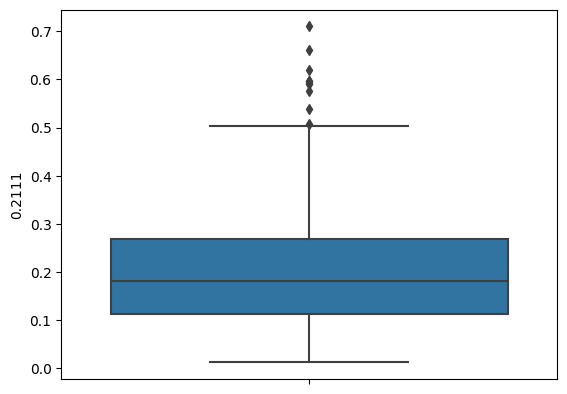

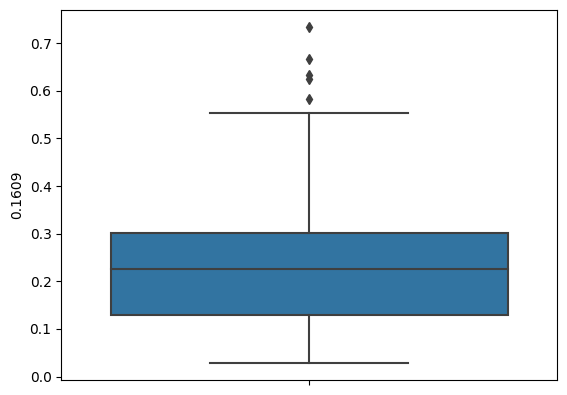

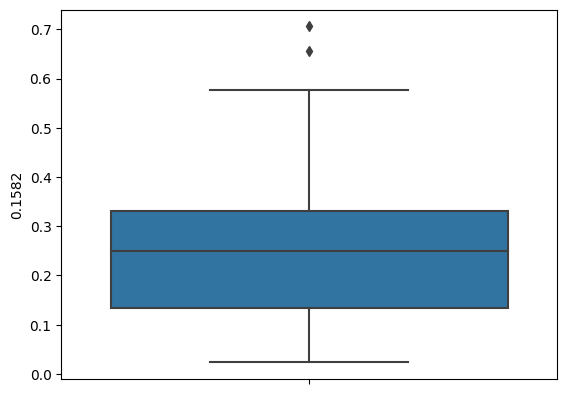

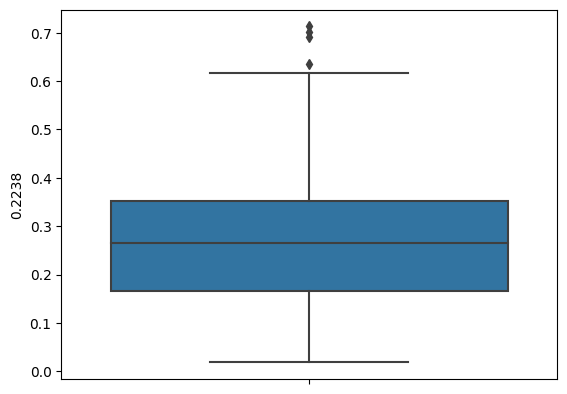

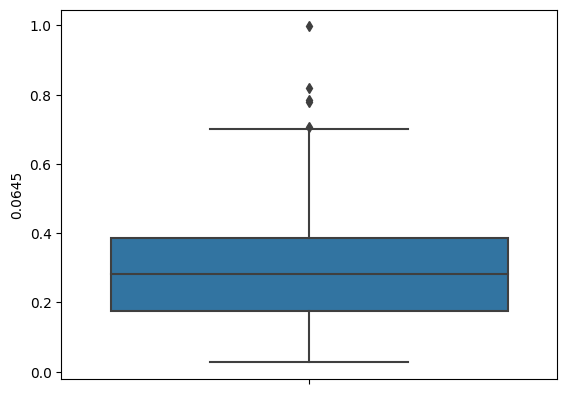

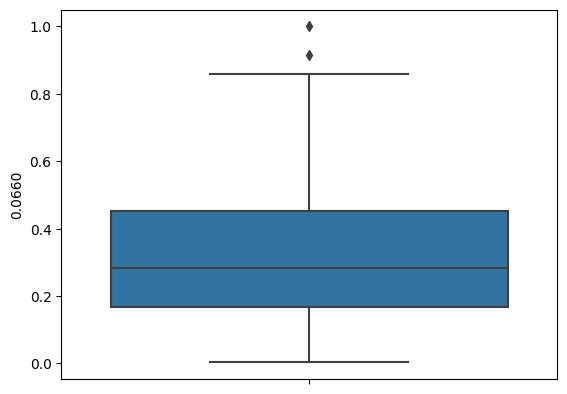

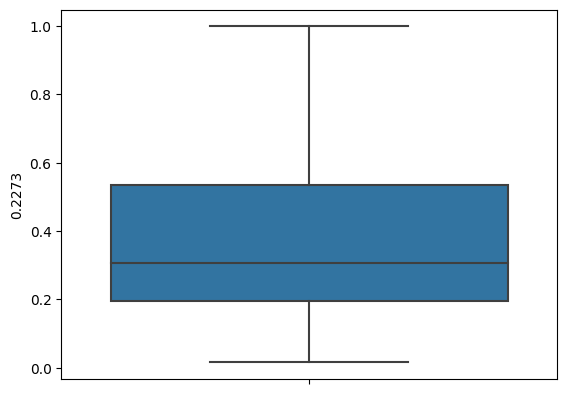

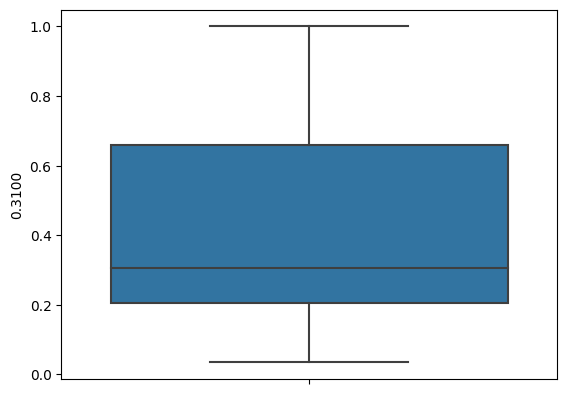

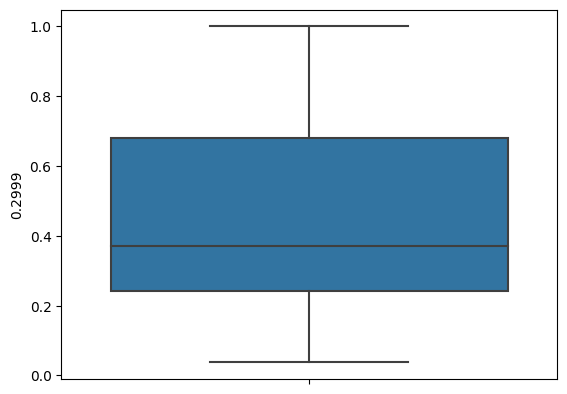

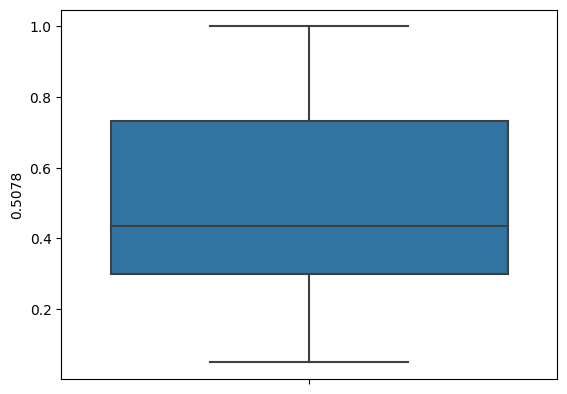

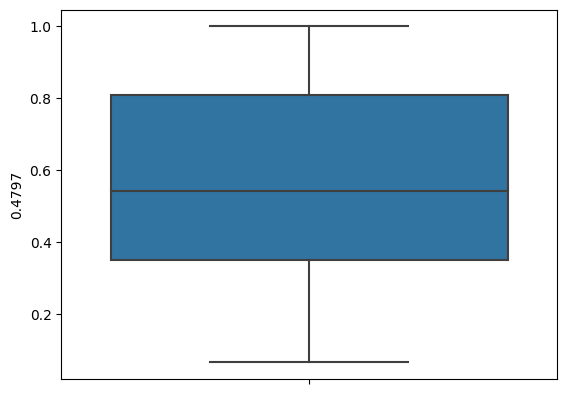

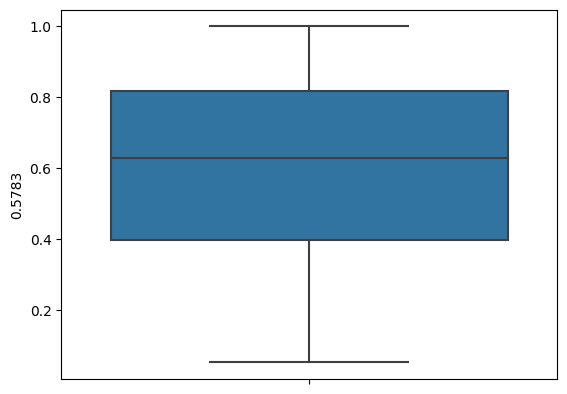

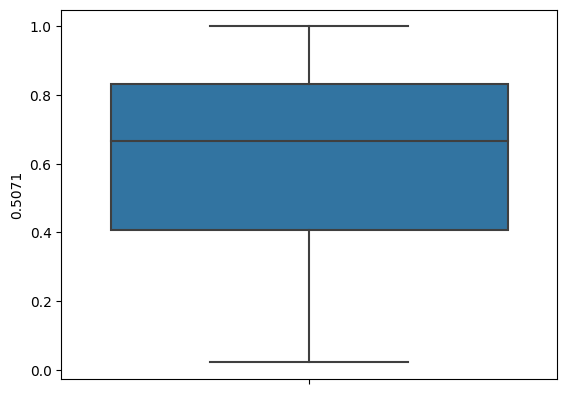

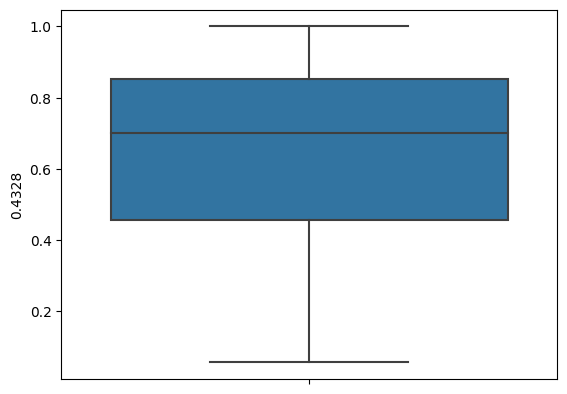

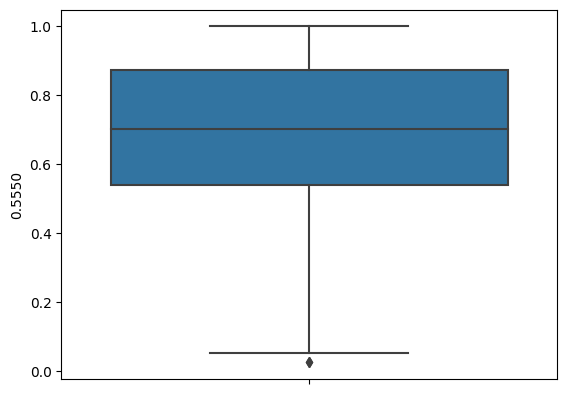

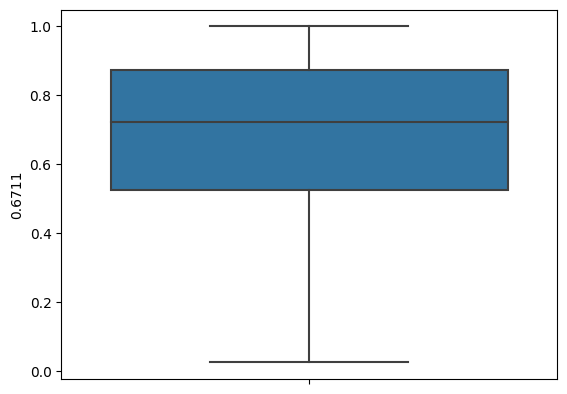

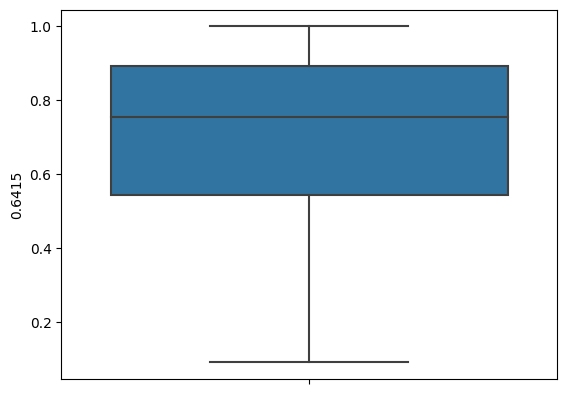

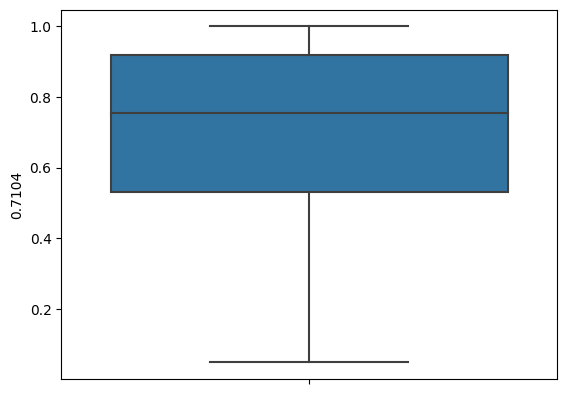

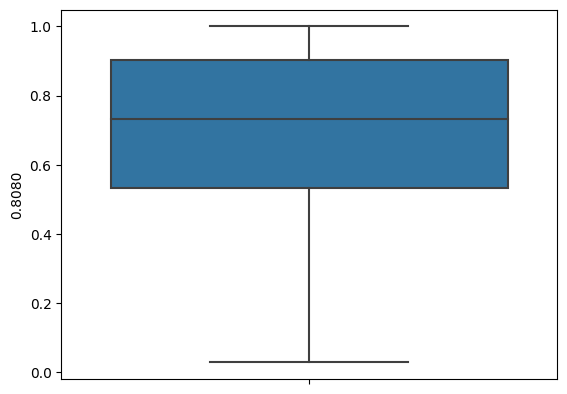

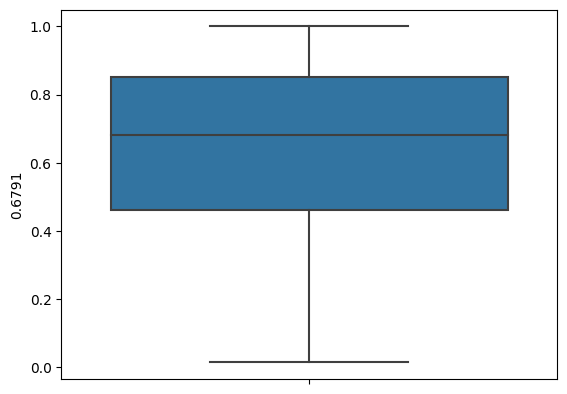

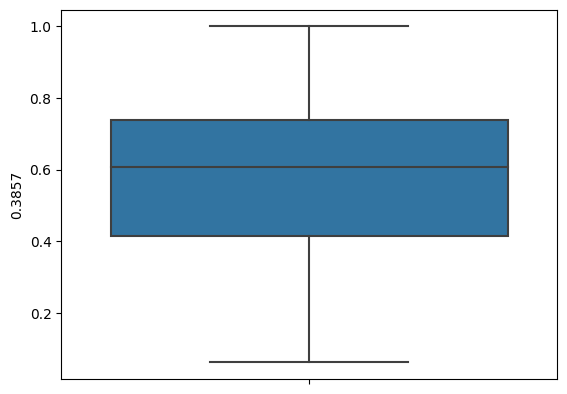

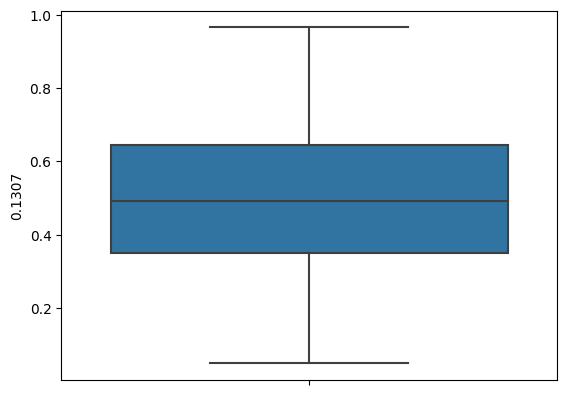

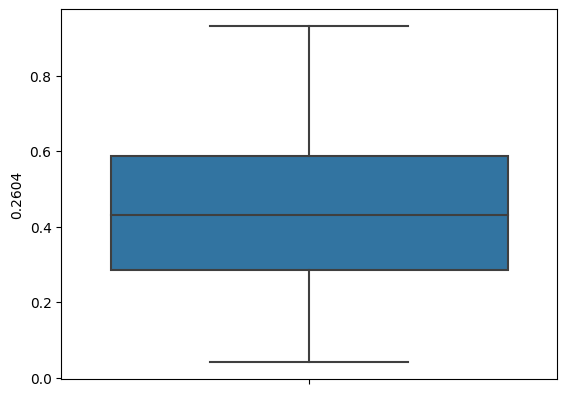

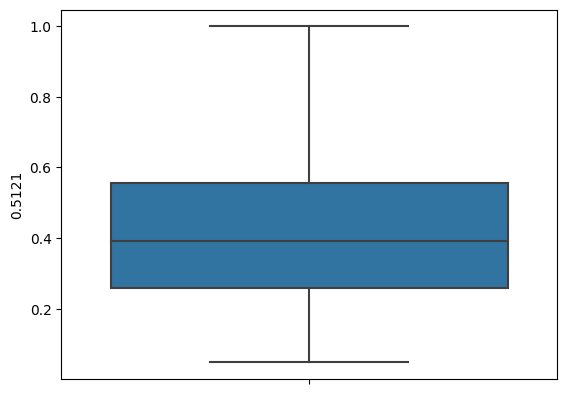

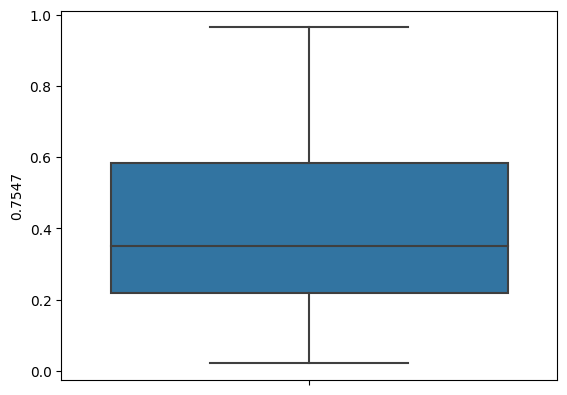

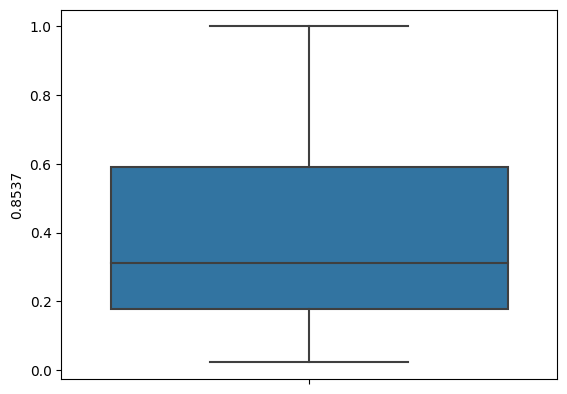

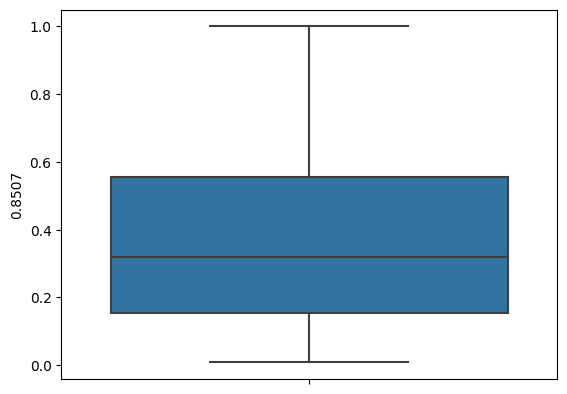

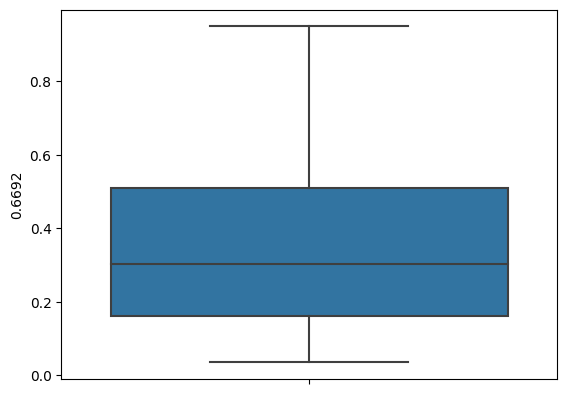

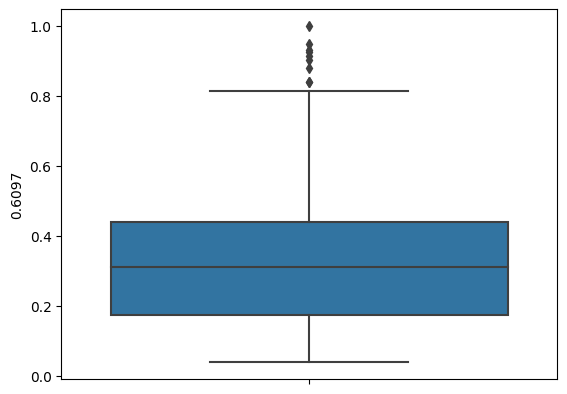

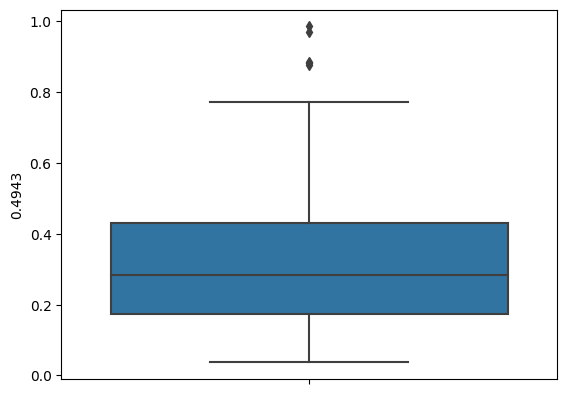

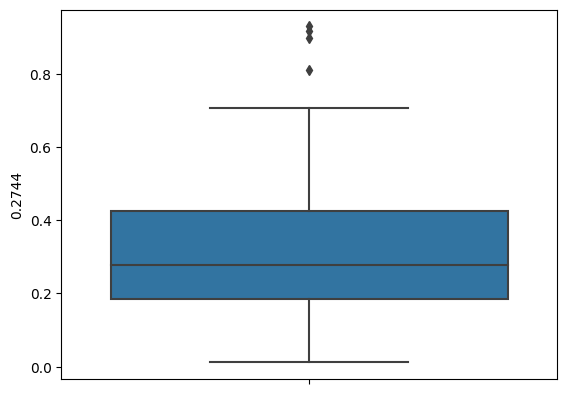

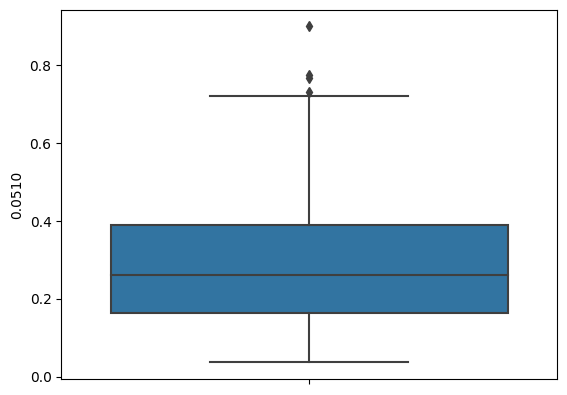

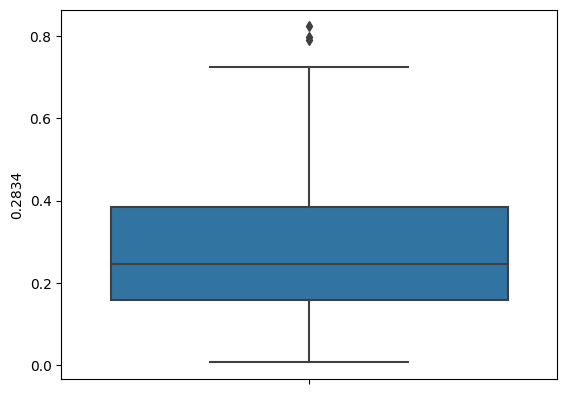

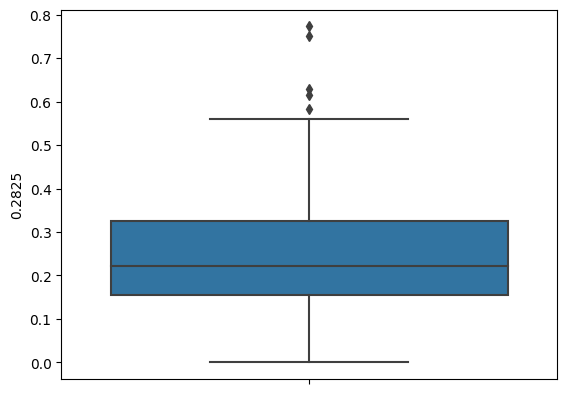

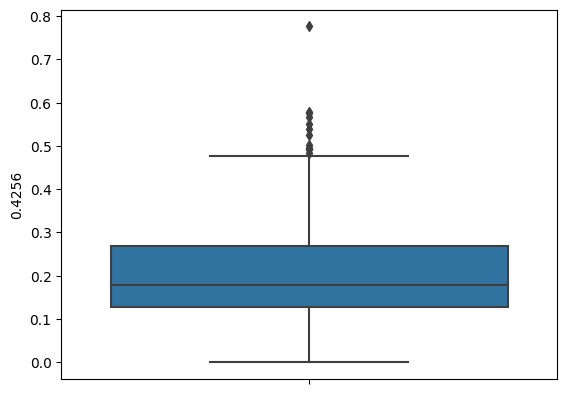

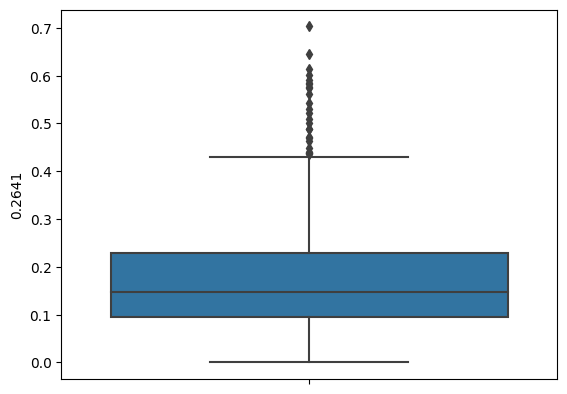

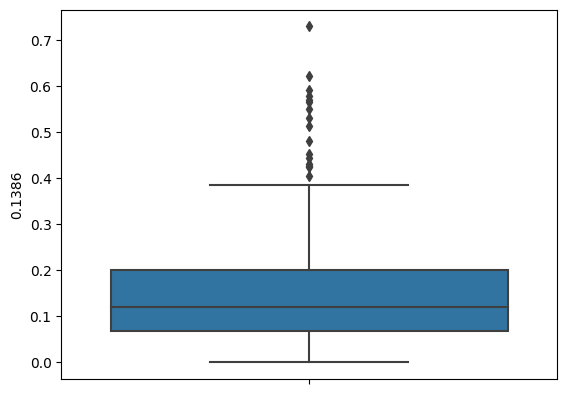

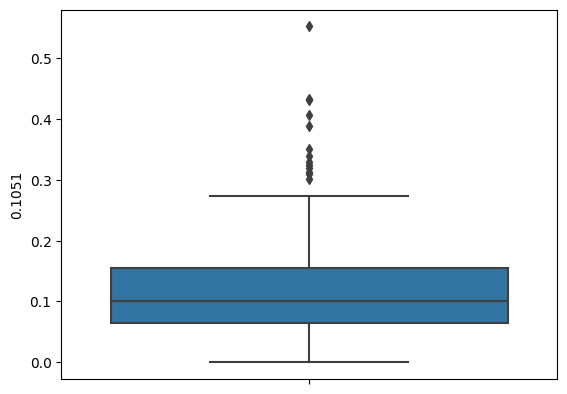

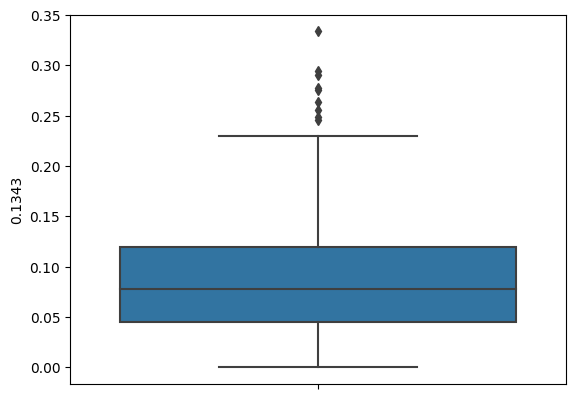

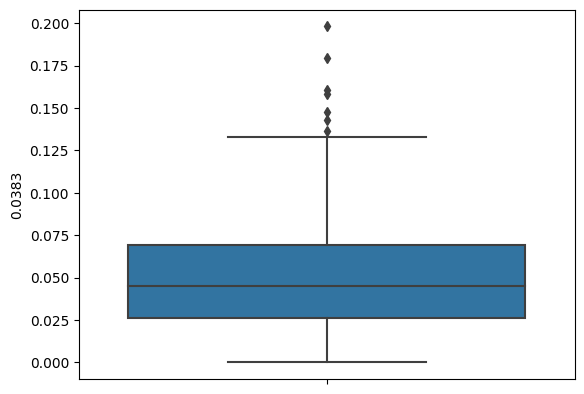

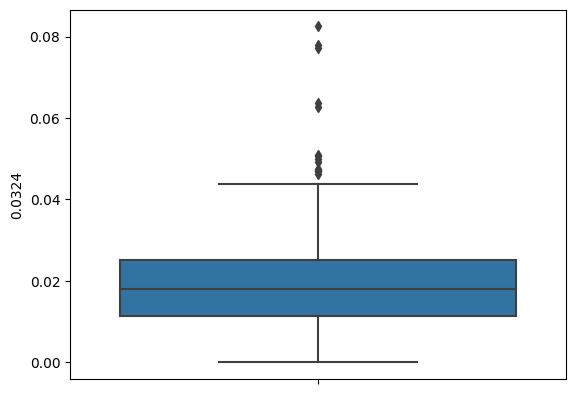

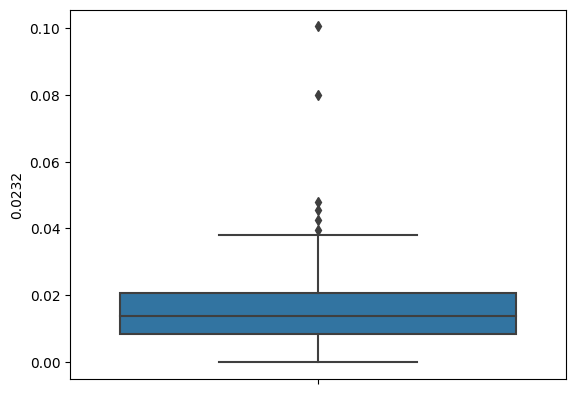

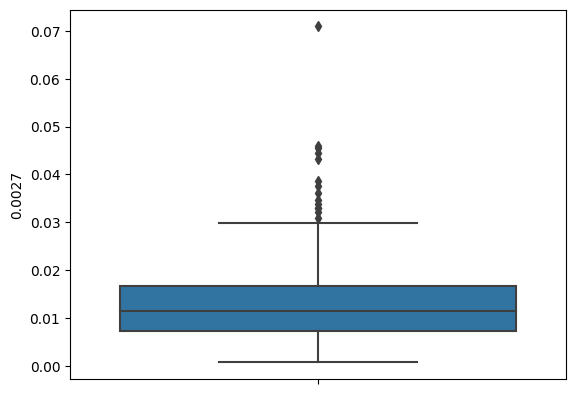

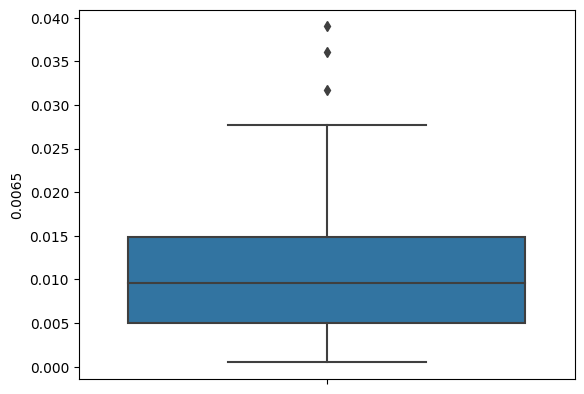

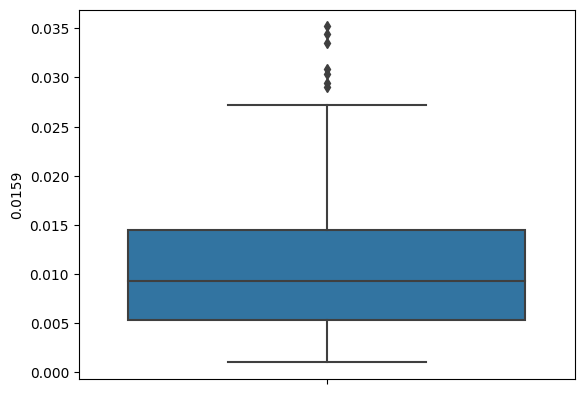

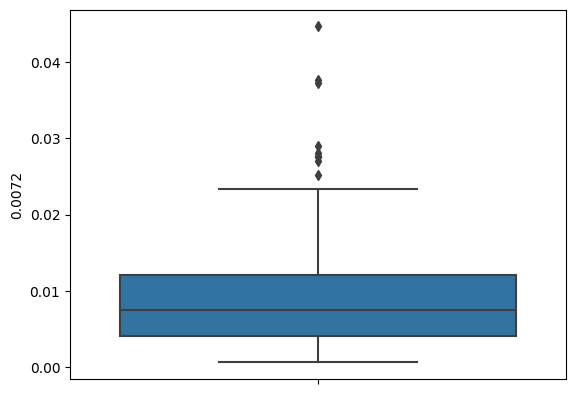

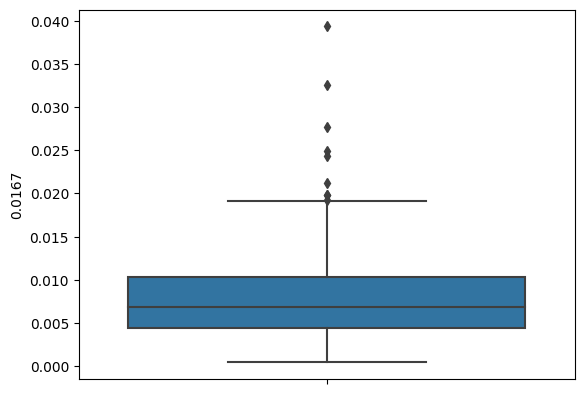

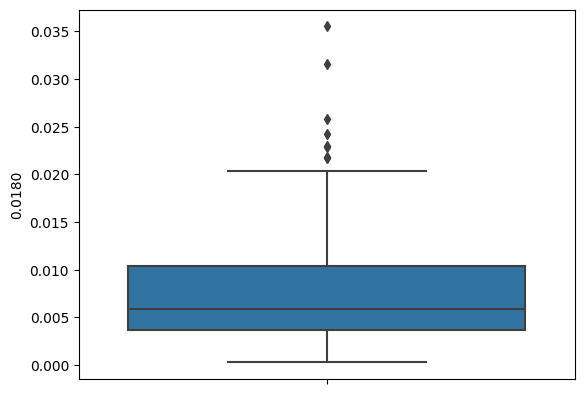

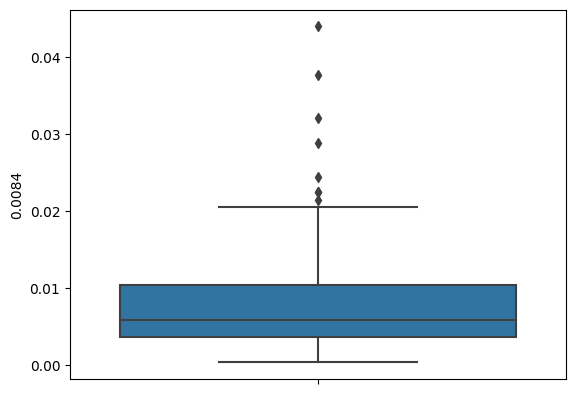

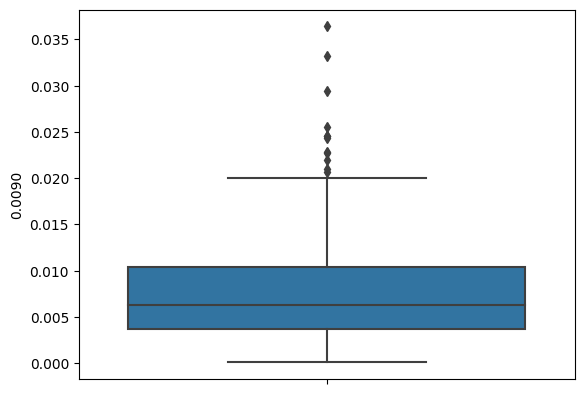

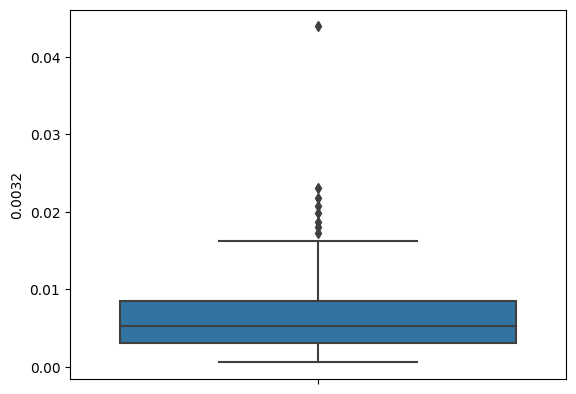

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()
    

##### Label Encoding the categorical columns

In [10]:
le = LabelEncoder()

In [11]:
data['R'] = le.fit_transform(data['R'])
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [12]:
sc=StandardScaler()

In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

##### Cross Validation

In [14]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

In [15]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=20,n_jobs=-1)
    print("cross validation model : {}".format(name))
    average_score = np.mean(scores)*100
    print("AVERAGE SCORE: ",average_score)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE SCORE:  72.18181818181819
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE SCORE:  64.00000000000001
****************************************************************************************************
cross validation model : RandomForestClassifier
AVERAGE SCORE:  76.54545454545455
****************************************************************************************************
cross validation model : KNeighborsClassifier
AVERAGE SCORE:  71.95454545454545
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE SCORE:  78.54545454545455
****************************************************************************************************


##### Let's proceed with GradientBoostingClassifier

In [16]:
model = GradientBoostingClassifier()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with GradientBoostingClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8333333333333334
confusion_matrix train is::  [[84  0]
 [ 0 81]]
confusion_matrix test is::  [[23  4]
 [ 3 12]]
Wrong Predictions made: 7 / 42


##### Confusion Matrix For Training & Testing Data

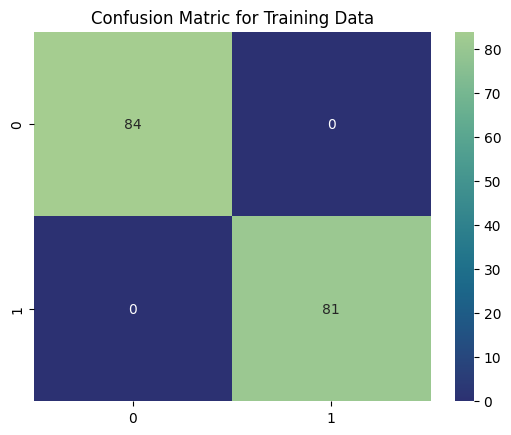

In [19]:
plt.title('Confusion Matric for Training Data')
sns.heatmap(con_train, annot=True, cmap='crest_r');

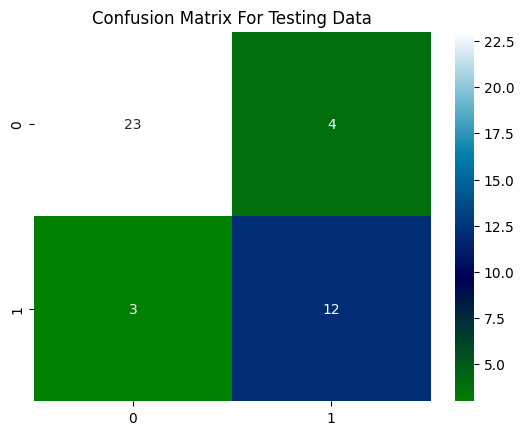

In [20]:
plt.title('Confusion Matrix For Testing Data')
sns.heatmap(con_test, annot=True, cmap='ocean');

##### ROC Curve

Model used is::  GradientBoostingClassifier()


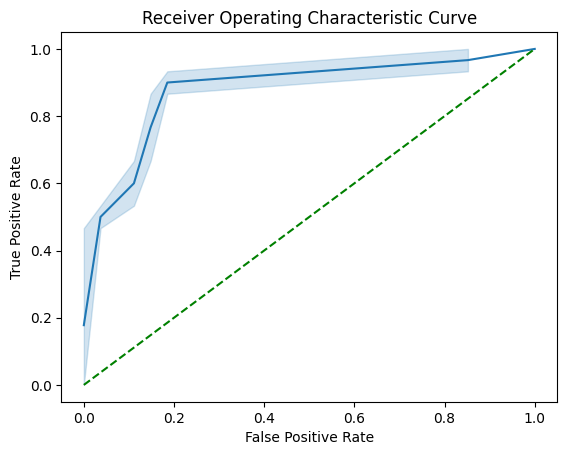

In [21]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()